Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]
Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]
For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %
Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


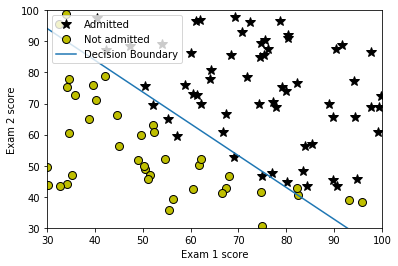

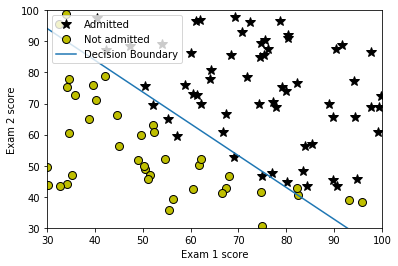

In [45]:
import numpy as np 
import scipy
from matplotlib import pyplot as plt 
from scipy import optimize
import os 

data = np.loadtxt('ex1data1.txt', delimiter=',')
                  
X, y = data[:, 0:2], data[:, 2]
X= np.concatenate((np.ones((X.shape[0],1)),X),axis=1)



def plotDecisionBoundary(plotData, theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.
    Parameters
    ----------
    plotData : func
        A function reference for plotting the X, y data.
    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).
    X : array_like
        The input dataset. X is assumed to be  a either:
            1) Mx3 matrix, where the first column is an all ones column for the intercept.
            2) MxN, N>3 matrix, where the first column is all ones.
    y : array_like
        Vector of data labels of shape (m, ).
    """
    # make sure theta is a numpy array
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        pyplot.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        pyplot.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
    
def plotData(X, y):
   
    fig = pyplot.figure()
    pos = y == 1
    neg = y == 0
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
   
    pyplot.xlabel('Exam 1 score')
    pyplot.ylabel('Exam 2 score')
    pyplot.legend(['Admitted', 'Not admitted'])
    pass



def sigmoid(z):
   
    z = np.array(z) 
    g = np.zeros(z.shape)
    g=np.exp(-z) +1
    g=1/g 
    return g

def costFunction(theta, X, y):
    
    m = y.size  
    J = 0
    grad = np.zeros(theta.shape)
    J=-(np.dot(np.log(sigmoid(np.dot(X,theta)).T),y)+np.dot(np.log(1-sigmoid(np.dot(X,theta)).T),(1-y)))/m
    grad=np.dot(X.T,(sigmoid(np.dot(X,theta))-y))/m
    return J, grad
                     
                     
initial_theta = np.zeros(X.shape[1])
                     

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')
        
                     
                     
                     
                     
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')
                     
                     
plotDecisionBoundary(plotData, theta, X, y)                     



def predict(theta, X):
    
    m = X.shape[0] # Number of training examples

    p = np.zeros(m)

    a=sigmoid(np.dot(X,theta)) 
    pos=a>=0.5
    p[pos]=1
    
 
    return p



prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')


p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')




  

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.12
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Cost at theta found by optimize.minimize: 0.243
Expected cost (approx): 0.203

theta:
	[20.850, 28.321, 20.022]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


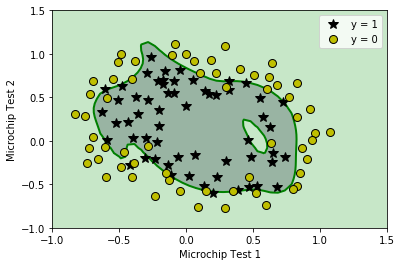

In [47]:
# here goes the regularization
import numpy as np 
import scipy
from matplotlib import pyplot  
from scipy import optimize
import os 
import math 

# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

def sigmoid(z):
   
    z = np.array(z) 
    g = np.zeros(z.shape)
    g=np.exp(-z) +1
    g=1/g 
    return g



def plotDecisionBoundary(plotData, theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.
    Parameters
    ----------
    plotData : func
        A function reference for plotting the X, y data.
    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).
    X : array_like
        The input dataset. X is assumed to be  a either:
            1) Mx3 matrix, where the first column is an all ones column for the intercept.
            2) MxN, N>3 matrix, where the first column is all ones.
    y : array_like
        Vector of data labels of shape (m, ).
    """
    # make sure theta is a numpy array
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        pyplot.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        pyplot.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
        
        
        
        
        
def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.
    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.
    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.
    degree: int, optional
        The polynomial degree.
    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)


def plotData(X, y):
   
    fig = pyplot.figure()
    pos = y == 1
    neg = y == 0
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    pyplot.xlabel('Microchip Test 1')
    pyplot.ylabel('Microchip Test 2')


    pyplot.legend(['y = 1', 'y = 0'], loc='upper right')

    pass




def costFunctionReg(theta, X, y, lambda_):
    
    m = y.size  

    J = 0
    grad = np.zeros(theta.shape)
   
    J=-(np.dot(np.log(sigmoid(np.dot(X,theta)).T),y)+np.dot(np.log(1-sigmoid(np.dot(X,theta)).T),(1-y)))/m+lambda_/2*(np.dot(theta[2:theta.shape[0]].T,theta[2:theta.shape[0]]))/m
    
    a= np.dot(X.T,(sigmoid(np.dot(X,theta))-y))/m
    grad[0]=a[0]
    b=lambda_*theta;
    grad[1:theta.shape[0]]=a[1:theta.shape[0]]+b[1:theta.shape[0]]/m ;
   

   
    return J, grad


X = mapFeature(X[:, 0], X[:, 1])


# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')

 
# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')




options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')
                     
                     
plotDecisionBoundary(plotData, theta, X, y)       